In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 1
Deadline: Wednesday, 27 December 2023, 23:59 IST

Name: Arvind Devkate
Roll Number: 220215
IITK Email: arvindd22@iitk.ac.in

Part A:

I.

1. Plot x vs y scatter plot for the given dataset
2. Plot the histogram of the y values
3. Clean the data by removing outliers and nan value containing datapoints
4. Plot a histogram for y values before and after cleaning the data.
5. Split the data into train and test with 85% of the data used for training

II.

1. Implement the following function:

  def gradient_descent(x,y,alpha,epochs)

  The function should return two parameter values (a,b)
  corresponding to the model  ŷ=a*x+b

2. Plot the histogram with the residuals (y- ŷ) after model training for the
   original and predicted values

3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot

  Note that the code for all of part A must be visible

  Preferrably use pandas for data cleaning and matplotlib for plotting

  Make sure all the code is run before you submit the notebook

Part B:

    1. Report the parameter values after training on the given data
       the target variable is 'y' and there is only one feature 'x'

    2. Report the MSE value for your model after training

    3. What do you think is the ideal ratio for train data if we are splitting
       the data into train and test datasets? Is the answer same irrespective of
       the size of the dataset? What percent would you take for training
       if your dataset has 1 feature, 1 target and 250 data points, what would
       you do if it had 10,000 data points instead of 250 data points

      Note that there is no single correct answer for part B

"""

"\nMatSoc: Intro to ML Techniques\nAssignment 1\nDeadline: Wednesday, 27 December 2023, 23:59 IST\n\nName: Arvind Devkate\nRoll Number: 220215\nIITK Email: arvindd22@iitk.ac.in\n\nPart A:\n\nI.\n\n1. Plot x vs y scatter plot for the given dataset\n2. Plot the histogram of the y values\n3. Clean the data by removing outliers and nan value containing datapoints\n4. Plot a histogram for y values before and after cleaning the data.\n5. Split the data into train and test with 85% of the data used for training\n\nII.\n\n1. Implement the following function:\n\n  def gradient_descent(x,y,alpha,epochs)\n\n  The function should return two parameter values (a,b)\n  corresponding to the model  ŷ=a*x+b\n\n2. Plot the histogram with the residuals (y- ŷ) after model training for the\n   original and predicted values\n\n3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot\n\n  Note that the code for all of part A must be visible\n\n  Preferrably use pandas for data cleaning an

In [ ]:
'''
Part A:

I.

1. Plot x vs y scatter plot for the given dataset
2. Plot the histogram of the y values
3. Clean the data by removing outliers and nan value containing datapoints
4. Plot a histogram for y values before and after cleaning the data.
5. Split the data into train and test with 85% of the data used for training
'''

'\nPart A:\n\nI.\n\n1. Plot x vs y scatter plot for the given dataset\n2. Plot the histogram of the y values\n3. Clean the data by removing outliers and nan value containing datapoints\n4. Plot a histogram for y values before and after cleaning the data.\n5. Split the data into train and test with 85% of the data used for training\n'

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
uploaded=files.upload()
data=pd.read_csv('data.csv')

Saving data.csv to data (1).csv


In [ ]:
data.x.head()

0    2
1    3
2    4
3    5
4    5
Name: x, dtype: int64

Text(0.5, 1.0, 'Scatter Plot of Data Points')

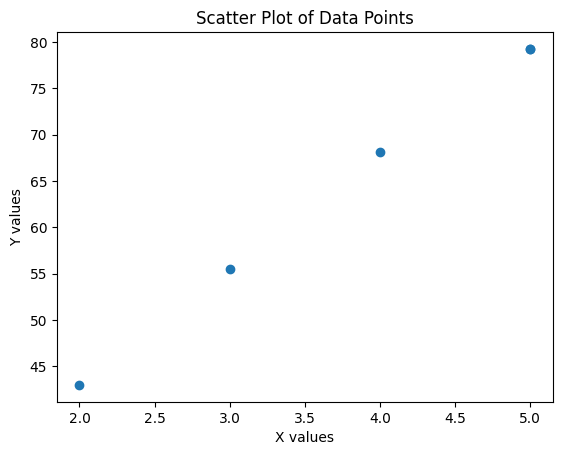

In [ ]:
''' 1. Plot x vs y scatter plot for the given dataset '''
fig_1=plt.figure()
plt.scatter(data.x.head(), data.y.head() )
plt.ylabel('Y values')
plt.xlabel('X values')
plt.title('Scatter Plot of Data Points')

Text(0.5, 1.0, 'Scatter Plot of All Data Points')

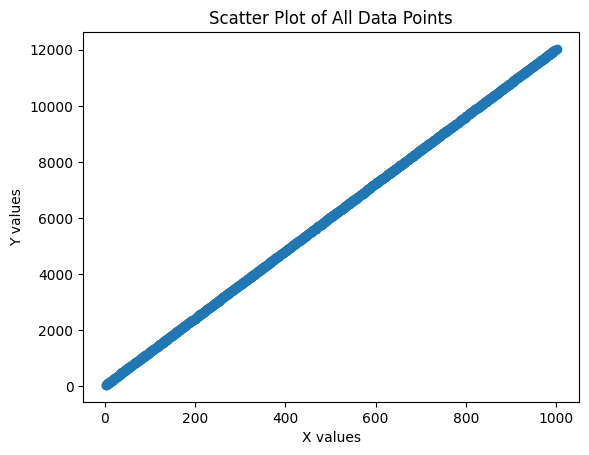

In [ ]:
fig_11=plt.figure()
plt.scatter(data.x, data.y)
plt.ylabel('Y values')
plt.xlabel('X values')
plt.title('Scatter Plot of All Data Points')

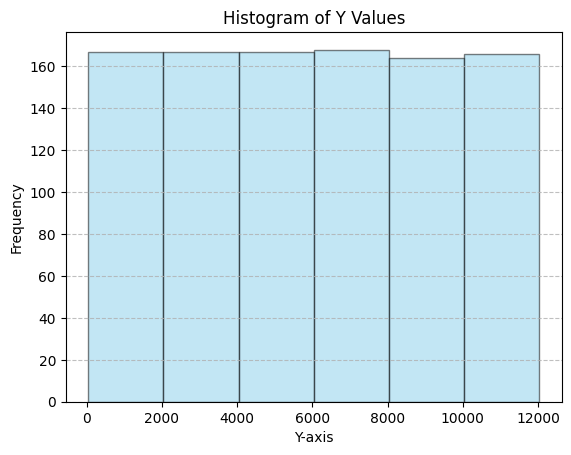

In [ ]:
''' 2. Plot the histogram of the y values '''
fig_2=plt.figure()
plt.hist(data.y, bins=6, edgecolor='black', color='skyblue', alpha=0.5)
plt.title('Histogram of Y Values')
plt.xlabel('Y-axis')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.8)

In [ ]:
''' 3. Clean the data by removing outliers and nan value containing datapoints '''
data.dropna(inplace=True)            # Drops the nan values from the rows
data.drop_duplicates(inplace=True)   # Drops the duplicate values


In [ ]:
data.mean()

Unnamed: 0     499.000000
x              499.991992
y             6018.931892
dtype: float64

In [ ]:
data.std()

Unnamed: 0     288.530761
x              288.486990
y             3461.829098
dtype: float64

In [ ]:
z_scores = np.abs((data - data.mean()) / data.std())
z_scores

,Unnamed: 0,x,y
0,1.729452,1.726220,1.726235
1,1.725986,1.722754,1.722630
2,1.722520,1.719287,1.718991
3,1.719054,1.715821,1.715767
4,1.715588,1.715821,1.715767
...,...,...,...
994,1.715588,1.712410,1.712721
995,1.719054,1.719343,1.719411
996,1.722520,1.722809,1.723120
997,1.725986,1.726275,1.726171


In [ ]:
data_clean=data[(z_scores < 1.7).all(axis=1)]
data_clean.info()
data_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 9 to 989
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  981 non-null    int64  
 1   x           981 non-null    int64  
 2   y           981 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 30.7 KB


,Unnamed: 0,x,y
count,981.000000,981.000000,981.000000
mean,499.000000,499.986748,6018.864587
std,283.334608,283.298099,3399.561900
min,9.000000,10.000000,139.000000
25%,254.000000,255.000000,3078.400000
50%,499.000000,500.000000,6018.520000
75%,744.000000,743.000000,8934.520000
max,989.000000,990.000000,11899.600000


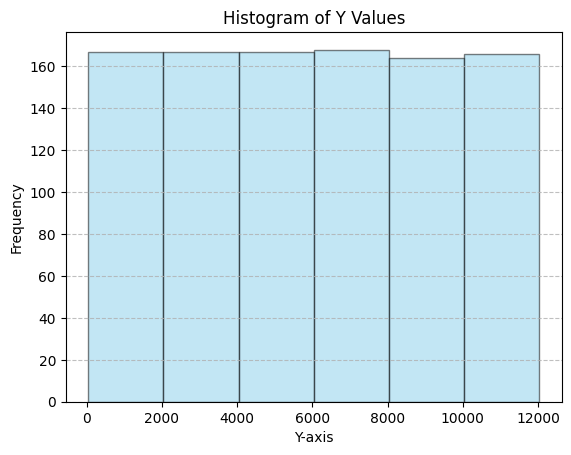

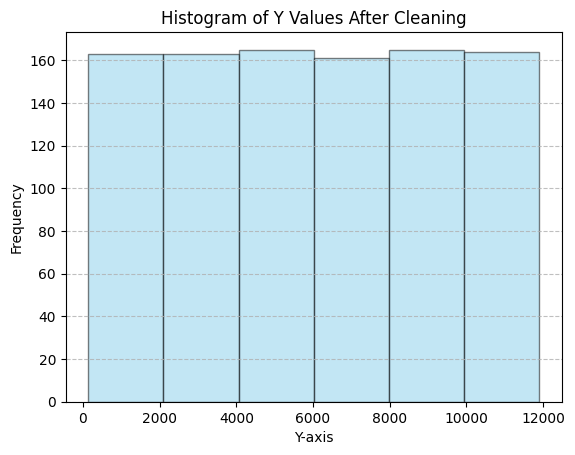

In [ ]:
''' 4. Plot a histogram for y values before and after cleaning the data. '''

fig_4=plt.figure()
plt.hist(data_clean.y, bins=6, edgecolor='black', color='skyblue', alpha=0.5)
plt.title('Histogram of Y Values After Cleaning')
plt.xlabel('Y-axis')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.8)

fig_2

In [ ]:
''' 5. Split the data into train and test with 85% of the data used for training '''
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_clean, test_size=0.15, random_state=42)

train_size = int(len(data_clean.x) * 0.85)

 # Split the data into training and testing sets
x_train, y_train = data_clean.x[:train_size], data_clean.y[:train_size]
x_test, y_test = data_clean.x[train_size:], data_clean.y[train_size:]


In [ ]:
''' II
1. Implement the following function:

  def gradient_descent(x,y,alpha,epochs)

  The function should return two parameter values (a,b)
  corresponding to the model  ŷ=a*x+b '''

def gradient_descent(x, y, alpha, epochs):
    # Initialize parameters
    a = 0
    b = 0
    m = len(x)

    # Gradient Descent
    for epoch in range(epochs):
        # Calculate predictions
        y_pred = a * x + b

        # Calculate errors
        error = y_pred - y

        # Update parameters using gradient descent
        a = a - alpha * (1/m) * sum(error * x)
        b = b - alpha * (1/m) * sum(error)

    return a,b
    # 12
    # 0.22

In [ ]:
a,b=gradient_descent(x_train, y_train, alpha=0.000001, epochs=100)
print(a,b)

12.033823852477717 0.02188076725336551


In [ ]:
x=x_train
#Calculate Predicted Values
y_pred= a*x+b

# Calculate residuals
residuals = y_train - y_pred

print(y_pred.describe() , residuals.describe())


count      833.000000
mean      5126.705323
std       2895.720599
min        120.360119
25%       2611.361657
50%       5126.430842
75%       7641.500027
max      10144.535388
Name: x, dtype: float64 count    833.000000
mean       4.597198
std        8.176002
min      -10.615388
25%       -2.389726
50%        4.630340
75%       11.543338
max       19.464585
dtype: float64


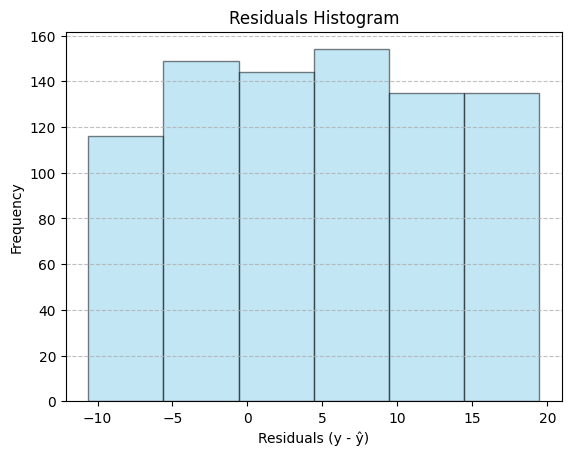

In [ ]:
''' II
2. Plot the histogram with the residuals (y- ŷ) after model training for the
   original and predicted values '''

fig_22=plt.figure()
plt.hist(residuals, bins=6, edgecolor='black', color='skyblue', alpha=0.5)
plt.title('Residuals Histogram')
plt.xlabel('Residuals (y - ŷ)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.8)



Text(0.5, 1.0, 'Scatter Plot of Data Points')

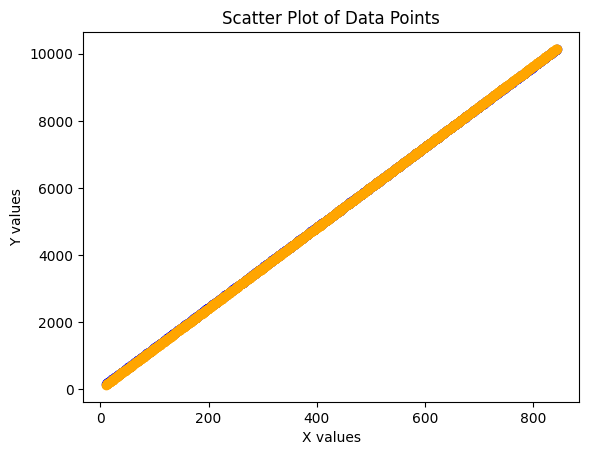

In [ ]:
'''  Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot '''
fig_33=plt.figure()
plt.scatter(x_train , y_train, color='blue' )
plt.scatter(x_train , y_pred, color='orange' )
plt.ylabel('Y values')
plt.xlabel('X values')
plt.title('Scatter Plot of Data Points')

Text(0.5, 1.0, 'Scatter Plot of Data Points')

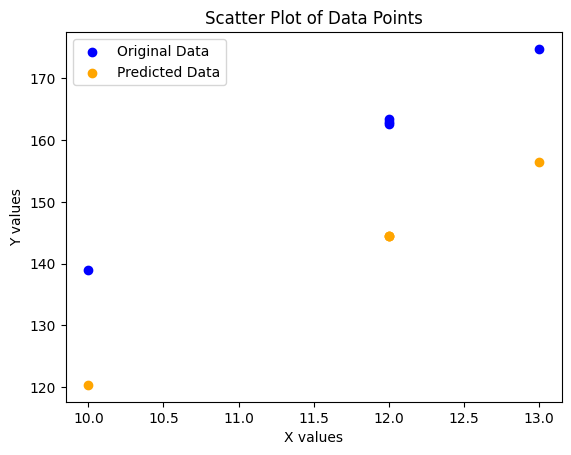

In [ ]:
fig_313=plt.figure()
plt.scatter(x_train.head() , y_train.head(), color='blue' , label='Original Data')
plt.scatter(x_train.head() , y_pred.head() , color='orange', label='Predicted Data' )
plt.ylabel('Y values')
plt.xlabel('X values')
plt.legend()
plt.title('Scatter Plot of Data Points')

In [ ]:
'''
Part B:

    1. Report the parameter values after training on the given data
       the target variable is 'y' and there is only one feature 'x' '''
a,b=gradient_descent(x_train, y_train, alpha=0.000001, epochs=100)
print(a,b)


12.033823852477717 0.02188076725336551


In [ ]:
''' 2. Report the MSE value for your model after training '''
MSE = np.mean((y_pred - y_train)**2)
print(MSE)

87.90099795532785


In [ ]:
''' What do you think is the ideal ratio for train data if we are splitting
       the data into train and test datasets? Is the answer same irrespective of
       the size of the dataset? What percent would you take for training
       if your dataset has 1 feature, 1 target and 250 data points, what would
       you do if it had 10,000 data points instead of 250 data points '''

''' Solution: train_data to test_data ratio should be 80-20 %. This ratio is often used because
it provides a good balance between the amount of data used for training and the amount of data used for testing.

If we use more data for testing the model rather training it the model will not be able to generate disired output (under-fitting)
where as, if in some cases if training data is lot more and test data is very small it may lead to (over-fitting) of model.

I would take if the dataset has 1 feature, 1 target, and 250 data points, will use 200 data points for training and 50 data points for testing.
If the dataset has 10,000 data points, will use 8,000 data points for training and 2,000 data points for testing. '''

' Solution: train_data to test_data ratio should be 80-20 %. This ratio is often used because \nit provides a good balance between the amount of data used for training and the amount of data used for testing. \n\nIf we use more data for testing the model rather training it the model will not be able to generate disired output (under-fitting) \nwhere as, if in some cases if training data is lot more and test data is very small it may lead to (over-fitting) of model. \n\nI would take if the dataset has 1 feature, 1 target, and 250 data points, will use 200 data points for training and 50 data points for testing. \nIf the dataset has 10,000 data points, will use 8,000 data points for training and 2,000 data points for testing. '